In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)
from keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(1234)
import numpy as np
import numpy as np
import pickle
import keras

In [2]:
dirname = 'Checkboxes Training Data'

counter = 0
classes = []
data = []

for file in os.listdir(os.path.join(dirname)):
    
    if (file.split('.')[1]) == 'jpg':
    
        #read images in grayscale
        img = cv2.imread(os.path.join(dirname,file),0)

        if file.find('0 (') != -1:
            classes.append(0)
            resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_LINEAR)
            data.append(resized)
                    
        if file.find('1 (') != -1:
            classes.append(1)
            resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_LINEAR)
            data.append(resized)
        
        if file.find('2 (') != -1:
            classes.append(2)
            resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_LINEAR)
            data.append(resized)
            
print('Non-Checkbox Labels: ',classes.count(0))
print('Checkbox Labels: ',classes.count(1))

data = np.array(data)
print('Total Samples available for training: ',data.shape[0])


#split the training and test samples
X_train_orig, X_test_orig, Y_train_orig,Y_test_orig = train_test_split(data, classes, test_size=0.05, random_state=1)

Non-Checkbox Labels:  423
Checkbox Labels:  508
Total Samples available for training:  931


class label = 0
(32, 32)


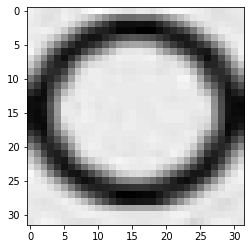

In [3]:
#lets just check a random image from the set
index = 198
plt.imshow(X_train_orig[index],cmap = 'gray')
print("class label = " + str(np.squeeze(Y_train_orig[index])))
print(X_train_orig[index].shape)

In [4]:
#keras things
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.regularizers import l2


Y_test_orig = to_categorical(Y_test_orig, num_classes=2) 
Y_train_orig = to_categorical(Y_train_orig, num_classes=2)

# 3 layer ConvNet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(32,32,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#dense layer
model.add(layers.Flatten())

#add the regulizer
model.add(layers.Dense(128, activation='linear', activity_regularizer=l2(0.0003)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))  

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [5]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

ntrain = len(X_train_orig)
nval = len(X_test_orig)
X_train_orig = X_train_orig.reshape((len(X_train_orig),32,32,1)) 
X_test_orig = X_test_orig.reshape((len(X_test_orig),32,32,1))

train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range = 40, width_shift_range = .2,
                                  height_shift_range = .2, shear_range = .2, zoom_range =  .2, horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow(X_train_orig,Y_train_orig,batch_size=32)
val_generator = val_datagen.flow(X_test_orig,Y_test_orig,batch_size = 32)


#X_train_orig, X_test_orig, Y_train_orig,Y_test_orig
history = model.fit_generator(train_generator,steps_per_epoch = ntrain/32, epochs = 64, validation_data = val_generator, validation_steps = nval/32  )


Epoch 1/64
27/27 [==============================] - 3s 37ms/step - loss: 0.6961 - accuracy: 0.5234 - val_loss: 0.7195 - val_accuracy: 0.5319
Epoch 2/64
27/27 [==============================] - 0s 15ms/step - loss: 0.6963 - accuracy: 0.5375 - val_loss: 0.6997 - val_accuracy: 0.5319
Epoch 3/64
27/27 [==============================] - 0s 15ms/step - loss: 0.6858 - accuracy: 0.5693 - val_loss: 0.6923 - val_accuracy: 0.5745
Epoch 4/64
27/27 [==============================] - 0s 15ms/step - loss: 0.6884 - accuracy: 0.5650 - val_loss: 0.6892 - val_accuracy: 0.5745
Epoch 5/64
27/27 [==============================] - 0s 16ms/step - loss: 0.6794 - accuracy: 0.5945 - val_loss: 0.6835 - val_accuracy: 0.5745
Epoch 6/64
27/27 [==============================] - 0s 16ms/step - loss: 0.6798 - accuracy: 0.5925 - val_loss: 0.6817 - val_accuracy: 0.5745
Epoch 7/64
27/27 [==============================] - 0s 17ms/step - loss: 0.6532 - accuracy: 0.6148 - val_loss: 0.6536 - val_accuracy: 0.6170
Epoch 8/64
27

Epoch 59/64
27/27 [==============================] - 1s 19ms/step - loss: 0.3460 - accuracy: 0.8421 - val_loss: 0.3217 - val_accuracy: 0.8298
Epoch 60/64
27/27 [==============================] - 1s 19ms/step - loss: 0.3156 - accuracy: 0.8599 - val_loss: 0.3316 - val_accuracy: 0.8298
Epoch 61/64
27/27 [==============================] - 1s 18ms/step - loss: 0.3031 - accuracy: 0.8787 - val_loss: 0.3717 - val_accuracy: 0.8511
Epoch 62/64
27/27 [==============================] - 0s 17ms/step - loss: 0.2719 - accuracy: 0.8795 - val_loss: 0.3146 - val_accuracy: 0.8511
Epoch 63/64
27/27 [==============================] - 1s 18ms/step - loss: 0.2834 - accuracy: 0.8696 - val_loss: 0.2473 - val_accuracy: 0.8511
Epoch 64/64
27/27 [==============================] - 1s 18ms/step - loss: 0.2708 - accuracy: 0.8818 - val_loss: 0.2913 - val_accuracy: 0.8723


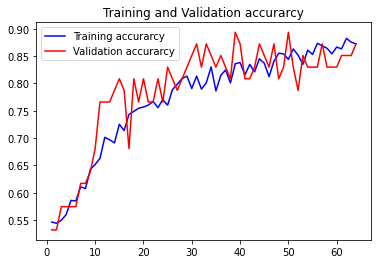

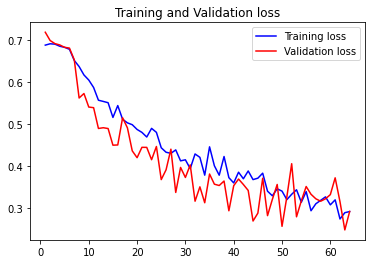

In [6]:

#lets plot the train and val curve, get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [7]:
_, accuracy = model.evaluate(val_generator,steps = 32)
print('Validation Accuracy: %.2f' % (accuracy*100))

_, accuracy = model.evaluate(train_generator,steps = 32)
print('Training Accuracy: %.2f' % (accuracy*100))

model.save('checkbox_keras_model_v1.h5')


32/32 [==============================] - 0s 8ms/step - loss: 0.2913 - accuracy: 0.8723
Validation Accuracy: 87.23
32/32 [==============================] - 0s 8ms/step - loss: 0.2608 - accuracy: 0.8880
Training Accuracy: 88.80
